In [1]:
import os
texts = {}
for writer in sorted(os.listdir('./book')):
    textNames = sorted(os.listdir('./book/' + writer))
    texts.update({writer: textNames})

writers = list(texts.keys())
print(writers)

['Бунин', 'Гончаров', 'Горький', 'Лермонтов', 'Чехов']


Выводим список произведений по авторам

In [2]:
print(texts)

{'Бунин': ['Антоновские яблоки.txt', 'Господин из Сан-Франциско.txt', 'Чистый понедельник.txt'], 'Гончаров': ['Антоновские яблоки.txt', 'Обломов.txt', 'Обыкновенная история.txt'], 'Горький': ['Детство.txt', 'На дне.txt', 'Старуха Изергиль.txt'], 'Лермонтов': ['Герой нашего времени.txt', 'Мцыри.txt', 'Панорама Москвы.txt'], 'Чехов': ['Барыня.txt', 'Ведьма.txt', 'Крыжовник.txt']}


Функция для разбиения входных текстов на части по n символов

In [3]:
import itertools
def grouper(n, iterable):
    args = [iter(iterable)] * n
    return list("".join([e for e in t if e != None]) for t in itertools.zip_longest(*args))



Загружаем тексты

In [7]:
data = []
label_list = []
for writer in writers:
    books = []
    for text in texts[writer]:
        with open('./book/' + writer + '/' + text) as bookFile:
            book = bookFile.read().replace('\n', ' ').replace('\xa0', ' ')
            for b in grouper(100000, book):
                books.append(b)
                label_list.append(writer + '_' + text[:-4])
    data.append(books)

Загрузка необходимых для работы с текстами модулей

In [9]:
import spacy
nlp = spacy.load('C:\\spacy-ru-master\\ru2')

In [11]:
from nltk.tokenize import sent_tokenize

Разобьём по предложениям

In [13]:
sent_tokenize_list = sent_tokenize(data[0][0])

In [14]:
for sent_index, sent in enumerate(sent_tokenize_list):
    print("#{}:{}".format(sent_index,sent))

#0:Антоновские яблоки Иван Алексеевич Бунин   Легкое дыхание «…Вспоминается мне ранняя погожая осень.
#1:Август был с теплыми дождиками, как будто нарочно выпадавшими для сева, – с дождиками в самую пору, в средине месяца, около праздника св.
#2:Лаврентия.
#3:А «осень и зима хороши живут, коли на Лаврентия вода тиха и дождик».
#4:Потом бабьим летом паутины много село на поля.
#5:Это тоже добрый знак: «Много тенетника на бабье лето – осень ядреная»… Помню раннее, свежее, тихое утро… Помню большой, весь золотой, подсохший и поредевший сад, помню кленовые аллеи, тонкий аромат опавшей листвы и – запах антоновских яблок, запах меда и осенней свежести.
#6:Воздух так чист, точно его совсем нет, по всему саду раздаются голоса и скрип телег…»      Иван Бунин  Антоновские яблоки      I   …Вспоминается мне ранняя погожая осень.
#7:Август был с теплыми дождиками, как будто нарочно выпадавшими для сева, – с дождиками в самую пору, в средине месяца, около праздника св.
#8:Лаврентия.
#9:А «осень и зи

#74:Тебе, значит, никак не меньше ста.
#75:Старик, который стоит перед барином вытянувшись, кротко и виновато улыбается.
#76:Что ж, мол, делать, – виноват, зажился.
#77:И он, вероятно, еще более зажился бы, если бы не объелся в Петровки луку.
#78:Помню я и старуху его.
#79:Все, бывало, сидит на скамеечке, на крыльце, согнувшись, тряся головой, задыхаясь и держась за скамейку руками, – все о чем-то думает.
#80:«О добре своем небось», – говорили бабы, потому что «добра» у нее в сундуках было, правда, много.
#81:А она будто и не слышит; подслеповато смотрит куда-то вдаль из-под грустно приподнятых бровей, трясет головой и точно силится вспомнить что-то.
#82:Большая была старуха, вся какая-то темная.
#83:Панева – чуть не прошлого столетия, чуньки – покойницкие, шея – желтая и высохшая, рубаха с канифасовыми косяками всегда белая-белая, – «совсем хоть в гроб клади».
#84:А около крыльца большой камень лежал: сама купила себе на могилку, так же как и саван, – отличный саван, с ангелами, с кре

#137:Сохранившаяся листва теперь будет висеть на деревьях уже до первых зазимков.
#138:Черный сад будет сквозить на холодном бирюзовом небе и покорно ждать зимы, пригреваясь в солнечном блеске.
#139:А поля уже резко чернеют пашнями и ярко зеленеют закустившимися озимями… Пора на охоту!
#140:И вот я вижу себя в усадьбе Арсения Семеныча, в большом доме, в зале, полной солнца и дыма от трубок и папирос.
#141:Народу много – все люди загорелые, с обветренными лицами, в поддевках и длинных сапогах.
#142:Только что очень сытно пообедали, раскраснелись и возбуждены шумными разговорами о предстоящей охоте, но не забывают допивать водку и после обеда.
#143:А на дворе трубит рог и завывают на разные голоса собаки.
#144:Черный борзой, любимец Арсения Семеныча, взлезает на стол и начинает пожирать с блюда остатки зайца под соусом.
#145:Но вдруг он испускает страшный визг и, опрокидывая тарелки и рюмки, срывается со стола: Арсений Семеныч, вышедший из кабинета с арапником и револьвером, внезапно огл

#194:Их портреты глядят на меня со стены, аристократически-красивые головки в старинных прическах кротко и женственно опускают свои длинные ресницы на печальные и нежные глаза…     IV   Запах антоновских яблок исчезает из помещичьих усадеб.
#195:Эти дни были так недавно, а меж тем мне кажется, что с тех пор прошло чуть не целое столетие.
#196:Перемерли старики в Выселках, умерла Анна Герасимовна, застрелился Арсений Семеныч… Наступает царство мелкопоместных, обедневших до нищенства.
#197:Но хороша и эта нищенская мелкопоместная жизнь!
#198:Вот я вижу себя снова в деревне, глубокой осенью.
#199:Дни стоят синеватые, пасмурные.
#200:Утром я сажусь в седло и с одной собакой, с ружьем и с рогом уезжаю в поле.
#201:Ветер звонит и гудит в дуло ружья, ветер крепко дует навстречу, иногда с сухим снегом.
#202:Целый день я скитаюсь по пустым равнинам… Голодный и прозябший, возвращаюсь я к сумеркам в усадьбу, и на душе становится так тепло и отрадно, когда замелькают огоньки Выселок и потянет из у

Функция, которая парсит по одному предложению и выводит некоторую информацию

In [15]:
def parse_one_sentence(one_sentence):
    doc = nlp(one_sentence)
    for token in doc:
        print('{} \ {} \ {} \ {} \ {} \ {}'.format(
            token.text, 
            token.lemma_,
            token.pos_, 
            token.tag_, 
            token.dep_, 
            token.head.text
        ))

Теперь проведем анализ для каждого из предложений

In [16]:
for sent_index, sent in enumerate(sent_tokenize_list[:10]):
    print("Sentence #{}\t{}".format(sent_index,sent))
    parse_one_sentence(sent)
    print('\n\n')

Sentence #0	Антоновские яблоки Иван Алексеевич Бунин   Легкое дыхание «…Вспоминается мне ранняя погожая осень.
Антоновские \ антоновский \ ADJ \ ADJ__Case=Nom|Degree=Pos|Number=Plur \ amod \ яблоки
яблоки \ яблоко \ NOUN \ NOUN__Animacy=Inan|Case=Nom|Gender=Neut|Number=Plur \ nsubj \ дыхание
Иван \ иван \ PROPN \ PROPN__Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing \ appos \ яблоки
Алексеевич \ алексеевич \ ADJ \ ADJ__Case=Nom|Degree=Pos|Gender=Masc|Number=Sing \ flat:name \ Иван
Бунин \ бунин \ PROPN \ PROPN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ flat:name \ Иван
   \    \ SPACE \ _SP \  \ Бунин
Легкое \ лёгкий \ ADJ \ ADJ__Case=Acc|Degree=Pos|Gender=Neut|Number=Sing \ amod \ дыхание
дыхание \ дыхание \ NOUN \ NOUN__Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing \ ROOT \ дыхание
« \ " \ PUNCT \ PUNCT___ \ punct \ дыхание
… \ … \ PUNCT \ PUNCT___ \ punct \ Вспоминается
Вспоминается \ вспоминаться \ VERB \ VERB__Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|V

подсохший \ подсохнуть \ VERB \ VERB__Aspect=Perf|Case=Nom|Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part|Voice=Act \ conj \ большой
и \ и \ CCONJ \ CCONJ___ \ cc \ поредевший
поредевший \ поредевший \ ADJ \ ADJ__Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing \ conj \ большой
сад \ сад \ NOUN \ NOUN__Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing \ obj \ Помню
, \ , \ PUNCT \ PUNCT___ \ punct \ помню
помню \ помнить \ VERB \ VERB__Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act \ conj \ Помню
кленовые \ кленовый \ ADJ \ ADJ__Animacy=Inan|Case=Acc|Degree=Pos|Number=Plur \ amod \ аллеи
аллеи \ аллея \ NOUN \ NOUN__Animacy=Inan|Case=Acc|Gender=Fem|Number=Plur \ obj \ помню
, \ , \ PUNCT \ PUNCT___ \ punct \ аромат
тонкий \ тонкий \ ADJ \ ADJ__Animacy=Inan|Case=Acc|Degree=Pos|Gender=Masc|Number=Sing \ amod \ аромат
аромат \ аромат \ NOUN \ NOUN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ conj \ аллеи
опавшей \ опасть \ VERB \ VERB__Aspect=Perf|Cas

Используем одно из предложений

In [18]:
sent_tokenize_list[30]

'И до вечера в саду толпится народ, слышится около шалаша смех и говор, а иногда и топот пляски…  К ночи в погоду становится очень холодно и росисто.'

Выводим семантическое дерево

In [19]:
doc = nlp(sent_tokenize_list[30])

from nltk import Tree

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

to_nltk_tree(list(doc.sents)[0].root).pretty_print()

                                                    толпится                                                                       
  _____________________________________________________|___________________________________                                         
 |    |     |     |             слышится                                               становится                                  
 |    |     |     |     ___________|____________                                 __________|___________________________             
 |    |     |     |    |                       смех                             |   |             ночи              холодно        
 |    |     |     |    |     ___________________|______________                 |   |       _______|_____        ______|_______     
 |    |   вечера саду  |    |      |     говор               топот              |   …      |           погоду   |           росисто
 |    |     |     |    |    |      |       |     ______________|_________

 Функция для получения атрибутов, характеризующих авторский стиль (число слов в предложении, 
 число потомков корня, глубина семантического дерева)

In [23]:
def attr(doc):
    out = {'sentSize': len(doc)}
    for word in doc:
        if word.dep_ =='ROOT': out.update({'rootChild': len(list(word.children))})

    import json

    def depth(jsn):
        if 'modifiers' in jsn.keys():
            return 1 +  max([0] + list(map(depth, jsn['modifiers'])))
        else:
            return 1

    j = json.loads(str(doc.print_tree()[0]).replace('\'', "\""))
    out.update({'depthTree': depth(j)})
    print(out)
    return out

In [24]:
doc

И до вечера в саду толпится народ, слышится около шалаша смех и говор, а иногда и топот пляски…  К ночи в погоду становится очень холодно и росисто.

In [25]:
from itertools import combinations

Вычисление числа встречающихся в тексте различных трилетов
Используются топ-10 из наиболее встречаемых трилетов

In [26]:
def treelets(data, topN=10):
    one_gram_treelet = {}
    two_gram_treelet = {}
    three_gram_treelet = {}
    for sent in sent_tokenize(data):
        doc = nlp(sent)

        for token in doc:
            key = token.pos_
            one_gram_treelet.update({key: one_gram_treelet.get(key, 0) + 1})

            key = (token.head.pos_, token.dep_, token.pos_)
            two_gram_treelet.update({key: two_gram_treelet.get(key, 0) + 1})

            for (left_child, right_child) in combinations(token.children, 2):
                if left_child.dep_ != 'punct' and right_child.dep_ != 'punct':
                    key = (1, left_child.pos_, left_child.dep_, token.pos_, right_child.dep_, right_child.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
            if token.dep_ != 'ROOT':
                for child in token.children:
                    if child.dep_ == 'punct' or token.dep_ == 'punct':
                        continue
                    key = (2, child.pos_, child.dep_, token.pos_, token.dep_, token.head.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
                    
    import operator
    sorted_1gram_treelet = {}
    from collections import OrderedDict
    from operator import itemgetter
    sorted_1gram_treelet = dict((sorted(one_gram_treelet.items(), key=itemgetter(1)))[-topN:])  
    sorted_2gram_treelet = dict((sorted(two_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    sorted_3gram_treelet = dict((sorted(three_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    return (len(sent_tokenize(data)), sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet)

In [27]:
(numOfSents, sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet) = treelets(data[0][0])
print(numOfSents)
print(sorted_1gram_treelet)

245
{'DET': 106, 'PART': 125, 'PRON': 165, 'ADV': 345, 'CCONJ': 357, 'ADP': 560, 'VERB': 631, 'ADJ': 658, 'PUNCT': 1136, 'NOUN': 1316}


In [28]:
print(sorted_2gram_treelet)
print(list(sorted_2gram_treelet.keys()))

{('VERB', 'advmod', 'ADV'): 161, ('VERB', 'nsubj', 'NOUN'): 162, ('VERB', 'ROOT', 'VERB'): 170, ('VERB', 'conj', 'VERB'): 183, ('NOUN', 'nmod', 'NOUN'): 208, ('NOUN', 'punct', 'PUNCT'): 291, ('VERB', 'obl', 'NOUN'): 360, ('NOUN', 'amod', 'ADJ'): 409, ('VERB', 'punct', 'PUNCT'): 435, ('NOUN', 'case', 'ADP'): 476}
[('VERB', 'advmod', 'ADV'), ('VERB', 'nsubj', 'NOUN'), ('VERB', 'ROOT', 'VERB'), ('VERB', 'conj', 'VERB'), ('NOUN', 'nmod', 'NOUN'), ('NOUN', 'punct', 'PUNCT'), ('VERB', 'obl', 'NOUN'), ('NOUN', 'amod', 'ADJ'), ('VERB', 'punct', 'PUNCT'), ('NOUN', 'case', 'ADP')]


In [42]:
print(sorted_3gram_treelet)

{(1, 'ADV', 'advmod', 'VERB', 'obl', 'NOUN'): 82, (2, 'ADP', 'case', 'NOUN', 'nmod', 'NOUN'): 91, (1, 'VERB', 'conj', 'VERB', 'conj', 'VERB'): 93, (1, 'CCONJ', 'cc', 'VERB', 'obl', 'NOUN'): 96, (2, 'CCONJ', 'cc', 'VERB', 'conj', 'VERB'): 101, (2, 'ADJ', 'amod', 'NOUN', 'obl', 'VERB'): 103, (2, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 113, (1, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 115, (1, 'ADP', 'case', 'NOUN', 'amod', 'ADJ'): 150, (2, 'ADP', 'case', 'NOUN', 'obl', 'VERB'): 276}


In [46]:
import pickle
if 1:
    # Анализ текстов по трилетам
    trByAuth = []
    for authorTexts in data:
        trByText = []
        for text in authorTexts:
            trByText.append(treelets(text))
        trByAuth.append(trByText)
        # Сохранение полученных атрибутов для дальнейшего использования
    with open('dataTr.pickle', 'wb') as f:
        pickle.dump(trByAuth, f)

In [47]:
with open('dataTr.pickle', 'rb') as f:
    trByAuth = pickle.load(f)

In [48]:
trAuth = []
for auth in trByAuth:
    trText = []
    for text in auth:
        numOfSent = text[0]
        numOfTreelets = list(map(lambda x: x/numOfSent, list(text[1].values()) + list(text[2].values()) + list(text[3].values())))
        trText.append(numOfTreelets)
    trAuth.append(trText)

In [49]:
# K-Means кластеризация
from sklearn.cluster import KMeans
Xtr = trAuth[0] + trAuth[1] + trAuth[2] + trAuth[3] + trAuth[4]

In [50]:
# Выбор оптимального числа классов
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(Xtr)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

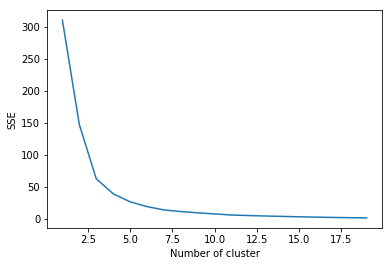

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Число кластеров =5 (по числу авторов):

In [53]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xtr)

Доля соответствия номера автора номеру кластера:

In [54]:
import numpy as np
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(trAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(trAuth[Nauth]))
    matches.append(clustMatches)

In [55]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.666667 0.055556 0.000000 0.200000 0.000000 0
0.000000 0.833333 0.142857 0.200000 0.333333 1
0.333333 0.000000 0.000000 0.000000 0.000000 0
0.000000 0.000000 0.285714 0.000000 0.333333 4
0.000000 0.111111 0.571429 0.600000 0.333333 3


Анализ текстов по атрибутам дерева

In [56]:
if 1:
    attrsByAuth = []
    for authorTexts in data:
        attrsByText = []
        for text in authorTexts:
            sents = sent_tokenize(text)
            attrBySent = []
            for sent in sents:
                doc = nlp(sent)
                try:
                    attrBySent.append(attr(doc))
                except:
                    pass
            attrsByText.append(attrBySent)
        attrsByAuth.append(attrsByText)
        with open('data.pickle', 'wb') as f:
            pickle.dump(attrsByAuth, f)

{'sentSize': 28, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 55, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 35, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 55, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 58, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 40, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 68, 'rootChil

{'sentSize': 92, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 62, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 32, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 86, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 39, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootC

{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 45, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 32, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 51, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 45, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 32, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 64, 'rootChild': 4, 'depthTree': 15}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 34, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 41, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 46, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 16, 'rootCh

{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 66, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 73, 'rootChild': 2, 'depthTree': 10}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 36, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 8, 'rootChild'

{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 39, 'rootChild': 2, 'depthTree': 15}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 35, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 54, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 10}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 66, 'ro

{'sentSize': 24, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 41, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 51, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 68, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 53, 'rootChild': 1, 'depthTree': 8}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 12, 'rootC

{'sentSize': 12, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 47, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 7

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'dept

{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 34, 'rootChild': 2, 'depthTree': 10}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'dep

{'sentSize': 30, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 52, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 22, 'rootChild'

{'sentSize': 6, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 1,

{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 65, 'rootChild': 8, 'depthTree': 8}
{'sentSize': 23, 'rootChild': 9, 'depthTree': 4}
{'sentSize': 37, 'rootChild': 3, 'depthTree': 9}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 48, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 58, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 34, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 44, 'rootChild': 4, 'depthTree': 11}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 51, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 12, 'roo

{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 46, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild':

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 38, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'de

{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 52, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 73, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 64, 'rootChild': 11, 'depthTree': 6}
{'sentSize': 37, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 30, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 68, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 58, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 52, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 108, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 27, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 46, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 35, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 11, 'r

{'sentSize': 43, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 39, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 32, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 22, 'rootChild': 8, 'depthTree': 7}
{'sentSize': 33, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 74, 'rootChild': 3, 'depthTree': 13}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 61, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 36, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 29, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 28, 'root

{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 31, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, '

{'sentSize': 24, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 3, 'rootChil

{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'd

{'sentSize': 9, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 27, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 

{'sentSize': 16, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 108, 'rootChild': 5, 'depthTree': 12}
{'sentSize': 10, 'rootChild': 8, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 57, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 34, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 39, 'ro

{'sentSize': 15, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 66, 'rootChild': 8, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 39, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 47, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 74, 'rootChild': 6, 'depthTree': 10}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 22, 'rootChil

{'sentSize': 78, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 57, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 51, 'rootChild': 9, 'depthTree': 8}
{'sentSize': 33, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 31, 'rootChild': 2, 'depthTree': 11}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 28, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 52, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 44, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 17, 'rootC

{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 88, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 60, 'rootChild': 1, 'depthTree': 9}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, '

{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 40, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 55, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 21, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 28, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 33, 'rootChi

{'sentSize': 27, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 41, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 44, 'rootChild': 11, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 60, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 36, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 

{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'dep

{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 44, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 50, 'rootChild': 4, 'depthTree': 11}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 42, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 62, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 3, 'rootChi

{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 44, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 4,

{'sentSize': 22, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 48, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 70, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depth

{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 38, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 32, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 11, 'rootChild'

{'sentSize': 11, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 30, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 54, 'rootChild': 10, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 48, 'rootChild': 7, 'depthTree': 8}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 24, 'rootChi

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 29, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 35, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 10, 'rootChild':

{'sentSize': 42, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 69, 'rootChild': 9, 'depthTree': 6}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 46, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 37, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChil

{'sentSize': 8, 'rootChild': 7, 'depthTree': 2}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 42, 'rootChild': 9, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 57, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 28, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 12, 'rootChild'

{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 37, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'dep

{'sentSize': 74, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 73, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 40, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 68, 'rootChild': 6, 'depthTree': 10}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 33, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 41, 'rootChild': 

{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 42, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 22, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 5

{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 42, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 25, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 41, 'rootChild': 2, 'd

{'sentSize': 21, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 49, 'rootChild': 7, 'depthTree': 11}
{'sentSize': 40, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 56, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 81, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 68, 'rootChild': 7, 'depthTree': 10}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 46, 'rootChild': 10, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 48, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 42, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 10,

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'de

{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 41, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 6, 'rootChild':

{'sentSize': 28, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 51, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 34, 'rootChild': 11, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 34, 'rootChild'

{'sentSize': 46, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 81, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 35, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 76, 'rootChild': 6, 'depthTree': 10}
{'sentSize': 40, 'rootChild': 3, 'depthTree': 9}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 55, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 44, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 36, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 15, 'rootChi

{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 4, 'de

{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 29, 'rootChild': 1, 'depthTree': 9}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2,

{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 22, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 4, 

{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 37, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 31, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild

{'sentSize': 32, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 9, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 21, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 32, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild':

{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3,

{'sentSize': 22, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 28, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 40, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 8, 'rootChil

{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 21, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'd

{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 46, 'rootChild': 3, 'depthTree': 9}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 51, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 49, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 32, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild':

{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 34, 'rootChild': 3, 'depthTree': 9}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 40, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 57, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 37, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 25, 'rootChild':

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 2,

{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 25, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 46, 'rootChi

{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 30, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 

{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 33, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 

{'sentSize': 15, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 54, 'rootChild': 8, 'depthTree': 9}
{'sentSize': 29, 'rootChild'

{'sentSize': 27, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 80, 'rootChild': 12, 'depthTree': 9}
{'sentSize': 35, 'rootChild': 8, 'depthTree': 7}
{'sentSize': 34, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 164, 'rootChild': 4, 'depthTree': 13}
{'sentSize': 69, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 32, 'rootChild': 10, 'depthTree': 4}
{'sentSize': 73, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 55, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 56, 'rootChild': 4, 'depthTree': 12}
{'sentSize': 50, 'rootChild': 2, 'depthTree': 11}
{'sentSize': 67, 'rootChild': 3, 'depthTree': 13}
{'sentSize': 64, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 78, 'rootChild': 5, 'depthTree': 9}
{'sentSize':

{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 53, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 28, 'rootChild': 1, 'depthTree': 8}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 25, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 

{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 46, 'rootChild': 1, 'depthTree': 8}
{'sentSize': 16, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 5, '

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 23, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2,

{'sentSize': 47, 'rootChild': 1, 'depthTree': 13}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 36, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 62, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 39, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 41, 'rootChild': 1, 'depthTree': 8}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 36, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 10, 'rootCh

{'sentSize': 38, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 

{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 

{'sentSize': 33, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 43, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 

{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 2, 'd

{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 54, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 10, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 41, 'rootChild': 10

{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 31, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 45, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4

{'sentSize': 23, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 41, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 87, 'rootChild': 13, 'depthTree': 8}
{'sentSize': 57, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 37, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 72, 'rootChild': 10, 'depthTree': 6}
{'sentSize': 76, 'rootChild': 8, 'depthTree': 8}
{'sentSize': 89, 'rootChild': 4, 'depthTree': 11}
{'sentSize': 69, 'rootChild': 11, 'depthTree': 6}
{'sentSize': 42, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 21, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 65, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 10, '

{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 6, 

{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 39, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 123, 'rootChild': 6, 'depthTree': 11}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 47, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 69, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 26, 'rootChild':

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 6, '

{'sentSize': 12, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 22, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 55, 'rootChild'

{'sentSize': 15, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 36, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 63, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 5, 'rootChild'

{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 9, 'rootChild':

{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 

{'sentSize': 13, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 63, 'rootChild': 10, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 

{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3

{'sentSize': 9, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 36, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 37, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 49, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 54, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild'

{'sentSize': 23, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 79, 'rootChild': 8, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 80, 'rootChild': 9, 'depthTree': 6}
{'sentSize': 39, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 35, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChi

{'sentSize': 75, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 45, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 70, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 

{'sentSize': 24, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 77, 'rootChild': 2, 'depthTree': 11}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 37, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 66, 'rootChild': 10, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 20, 'rootChild'

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 6, 'rootChild'

{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 6,

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 39, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 

{'sentSize': 16, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 34, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 43, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 43, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 

{'sentSize': 21, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 49, 'rootChild': 8, 'depthTree': 7}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 32, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 32, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 41, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 37, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 28, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 45, 'rootChi

{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 4,

{'sentSize': 12, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2,

{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 22, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 36, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 12, 'rootChil

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3

{'sentSize': 10, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 42, 'rootChild': 11, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild

{'sentSize': 24, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 40, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3

{'sentSize': 20, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3,

{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'dept

{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 5, 'dep

{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 36, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 32, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 111, 'rootChild': 10, 'depthTree': 11}
{'sentSize': 67, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild

{'sentSize': 32, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 44, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 21, 'rootChild'

{'sentSize': 25, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 57, 'rootChild': 6, 'depthTree': 10}
{'sentSize': 26, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 38, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 42, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 81, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 42, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 3, 'depthTree': 9}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 15, 'roo

{'sentSize': 24, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 25, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, '

{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 10, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4

{'sentSize': 32, 'rootChild': 7, 'depthTree': 8}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'de

{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 35, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 25, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 22, 'rootChi

{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 29, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 17, 'rootChild':

{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 33, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 3

{'sentSize': 39, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 33, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 36, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 50, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 29, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 38, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 

{'sentSize': 37, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 55, 'rootChild': 8, 'depthTree': 8}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 32, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 21, 'rootChild

{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 36, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 30, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 56, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 36, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 8, 'rootChild':

{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 2, 'd

{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 41, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 9, 'rootChild': 2, 'd

{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 32, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 25, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 38, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChil

{'sentSize': 20, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 25, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 48, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 41, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 37, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 12, 'root

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 40, 'rootChild': 10, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 41, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 6, 'rootChild':

{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 44, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'd

{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 29, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 28, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4

{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 38, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 34, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2

{'sentSize': 19, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 43, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 49, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 22, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 25, 'rootChild':

{'sentSize': 33, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 36, 'rootChild': 7, 'depthTree': 8}
{'sentSize': 48, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 47, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 20, 'rootChild

{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 5, 'dept

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild':

{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 25, 'rootChild':

{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 88, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 54, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 6,

{'sentSize': 62, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 37, 'rootChild': 10, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 28, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 44, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 53, 'rootChild': 5, 'depthTree': 11}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 27, 'rootC

{'sentSize': 8, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 27, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 34, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 43, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 51, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 113, 'rootChild': 3, 'depthTree': 11}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 57, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 44, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 32, 'rootChi

{'sentSize': 5, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 

{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 38, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 

{'sentSize': 13, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 26, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 42, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 43, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 44, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 10, 'rootC

{'sentSize': 18, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 45, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 47, 'rootChild': 11, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootCh

{'sentSize': 46, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 36, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 40, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 15, 'rootC

{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 40, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 41, 'rootChild':

{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 90, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 37, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 19, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 25, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 13, 'rootChil

{'sentSize': 23, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 52, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 92, 'rootChild': 3, 'depthTree': 17}
{'sentSize': 30, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 82, 'rootChild': 7, 'depthTree': 8}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 72, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 66, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 42, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 19, 'rootCh

{'sentSize': 37, 'rootChild': 10, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 35, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 45, 'rootChild': 1, 'depthTree': 8}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 32, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 32, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 35, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 27, 'rootChild': 9, 'depthTree': 4}
{'sentSize': 24, 'rootCh

{'sentSize': 19, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 45, 'rootChild': 7, 'depthTree': 10}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 31, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 79, 'rootChild': 11, 'depthTree': 7}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 62, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 55, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 88, 'rootChild': 8, 'depthTree': 10}
{'sentSize': 45, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 26, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 33, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 19, 

{'sentSize': 34, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 55, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 44, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 30, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 34, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 28, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 58, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 35, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 21, 'rootC

{'sentSize': 53, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 21, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 36, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 32, 'rootChild

{'sentSize': 17, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 35, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 33, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 33, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 38, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'roo

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 40, 'rootChild': 6, 'depthTree': 9}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 60, 'rootChild': 5, 'depthTree': 12}
{'sentSize': 36, 'rootChild': 2, 'depthTree': 12}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 62, 'rootChild': 10, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 27, 'rootCh

{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 43, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 112, 'rootChild': 4, 'depthTree': 13}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 42, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 32, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 32, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 55, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 45, 'rootChild': 11, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 34, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChi

{'sentSize': 35, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 64, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 44, 'rootChild': 4, 'depthTree': 11}
{'sentSize': 41, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 49, 'rootChild': 8, 'depthTree': 7}
{'sentSize': 44, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 42, 'rootChild': 9, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 39, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 36, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 42, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 76, 'rootChild': 13, 'depthTree': 6}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 35, 'ro

{'sentSize': 46, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 44, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 51, 'rootChild': 10, 'depthTree': 5}
{'sentSize': 31, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 31, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 55, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 89, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 58, 'rootChild': 13, 'depthTree': 6}
{'sentSize': 42, 'root

{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 63, 'rootChild': 4, 'depthTree': 11}
{'sentSize': 26, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 36, 'rootChild'

{'sentSize': 15, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 28, 'rootChild': 11, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 25, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 67, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 38, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 29, 'rootCh

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 44, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 47, 'rootChild': 5, 'depthTree': 8}
{'sentSize': 39, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 55, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 32, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 51, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 18, 'rootChild':

{'sentSize': 38, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 53, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 35, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 46, 'rootChild': 9, 'depthTree': 8}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 34, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 57, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 59, 'rootChild': 5, 'depthTree': 10}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 23, 'roo

{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 32, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 3, 'd

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 2, 'd

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'de

{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 22, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'd

{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 2, 'rootChild': 1, '

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 28, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 48, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'de

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'dep

{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 26, 'rootChild': 3, 'de

{'sentSize': 15, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 2, 'rootChild': 1, 

{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'de

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 27, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 30, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 3, 

{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 48, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 38, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'de

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 13, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 

{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 3, 'depth

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depth

{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 1, 'dep

{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 23, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 5, 'dep

{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'dept

{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 1, 'dept

{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 1, 'depth

{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 42, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 62, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 24, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 13, 'rootChil

{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 40, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 19, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild':

{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 38, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 88, 'rootChild': 13, 'depthTree': 9}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 24, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 5, 'rootChild'

{'sentSize': 37, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 24, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 49, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 4, 'rootChi

{'sentSize': 37, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 46, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 32, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 30, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 23, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 27, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 7, 'rootChil

{'sentSize': 41, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 24, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 23, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 25, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 26, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 9, 'rootChild': 2

{'sentSize': 21, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 20, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 32, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 19, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 38, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 55, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 37, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 86, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 51, 'rootChild': 2, 'depthTree': 8}
{'sentSize': 63, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 101, 'root

{'sentSize': 25, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 39, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 48, 'rootChild': 5,

{'sentSize': 13, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 57, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 25, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 22, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 31, 'rootChil

{'sentSize': 43, 'rootChild': 7, 'depthTree': 8}
{'sentSize': 83, 'rootChild': 10, 'depthTree': 8}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 38, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 47, 'rootChild': 9, 'depthTree': 7}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 36, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 31, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 24, 'rootChil

{'sentSize': 26, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 40, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 32, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 69, 'rootChild': 9, 'depthTree': 10}
{'sentSize': 44, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 31, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 53, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 58, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 69, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 40, 'root

{'sentSize': 51, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 48, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 21, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 32, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 17, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 36, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 7, 'depthTree': 3}
{'sentSize': 11, 'rootChild':

{'sentSize': 39, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 21, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 42, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 55, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 30, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild':

{'sentSize': 20, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 29, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 54, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 8, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 41, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 45, 'rootChild': 3, 'depthTree': 10}
{'sentSize': 29, 'rootChild

{'sentSize': 35, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 13, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 35, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 37, 'rootChild': 9, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 32, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 9}
{'sentSize': 12, 'rootChild': 

{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 5, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 51, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 35, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 37, 'rootChild': 7, 'depthTree': 7}
{'sentSize': 44, 'rootChild': 9, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 4,

{'sentSize': 52, 'rootChild': 5, 'depthTree': 11}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 47, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 1, 'depthTree': 7}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 

{'sentSize': 19, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 40, 'rootChild': 6, 'depthTree': 8}
{'sentSize': 42, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 39, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 53, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 41, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 26, 'rootChil

{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 40, 'rootChild': 7, 'depthTree': 9}
{'sentSize': 39, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 24, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 28, 'rootChild': 7, 'depthTree': 6}
{'sentSize': 14, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 38, 'rootChild': 6, 'depthTree': 7}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 44, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 36, 'rootChild': 10, 'depthTree': 5}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 37, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 17, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 5, 'rootC

{'sentSize': 10, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 15, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 14, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 20, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 9, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 29, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 40, 'rootChild': 4, 'depthTree': 10}
{'sentSize': 17, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 27, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 4, 'rootChil

{'sentSize': 60, 'rootChild': 9, 'depthTree': 6}
{'sentSize': 33, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 33, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 29, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 55, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 25, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 30, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 8, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 6, 'depthTree': 6}
{'sentSize': 21, 'rootChild': 7, 'depthTree': 4}
{'sentSize': 23, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 42, 'rootChild': 11, 'depthTree': 5}
{'sentSize': 27, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 39, 'rootChild': 4, 'depthTree': 7}
{'sentSize': 13, 'r

{'sentSize': 73, 'rootChild': 8, 'depthTree': 9}
{'sentSize': 53, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 31, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 33, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 45, 'rootChild': 3, 'depthTree': 7}
{'sentSize': 39, 'rootChild': 4, 'depthTree': 9}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 17, 'rootChild': 2, 'depthTree': 7}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 14, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 35, 'rootChild': 2, 'depthTree': 6}
{'sentSize': 8, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 32, 'rootChild':

{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'dept

{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 17, 'rootChild': 8, 'depthTree': 4}
{'sentSize': 25, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 3, '

{'sentSize': 10, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 19, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 6, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 16, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 2, 'de

{'sentSize': 8, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 26, 'rootChild': 3, 'depthTree': 8}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 25, 'rootChild': 1, 'depthTree': 9}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 12, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 8, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 13, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 21, 'rootChild': 3, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'd

{'sentSize': 16, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 10, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 2, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 10, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 12, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, '

{'sentSize': 20, 'rootChild': 3, 'depthTree': 6}
{'sentSize': 30, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 4}
{'sentSize': 16, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 48, 'rootChild': 7, 'depthTree': 5}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 18, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 9, 'rootChild': 2, 'depthTree': 4}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 7}
{'sentSize': 2, 'rootChild': 1, 'depthTree': 2}
{'sentSize': 9, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 18, 'rootChild': 5

{'sentSize': 19, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 8, 'rootChild': 5, 'depthTree': 3}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 3, 'rootChild': 2, 'depthTree': 2}
{'sentSize': 10, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 4, 'rootChild': 3, 'depthTree': 2}
{'sentSize': 11, 'rootChild': 6, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 3}
{'sentSize': 14, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 5, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 39, 'rootChild': 8, 'depthTree': 6}
{'sentSize': 15, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 4, 'depthTree': 3}
{'sentSize': 8, 'rootChild': 3, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 7, 'rootChild': 1, 'depthTree': 5}
{'sentSize': 12, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 6, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 19, 'rootChild': 2, 

{'sentSize': 5, 'rootChild': 4, 'depthTree': 2}
{'sentSize': 4, 'rootChild': 2, 'depthTree': 3}
{'sentSize': 117, 'rootChild': 11, 'depthTree': 9}
{'sentSize': 26, 'rootChild': 5, 'depthTree': 4}
{'sentSize': 20, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 5}
{'sentSize': 25, 'rootChild': 5, 'depthTree': 5}
{'sentSize': 77, 'rootChild': 8, 'depthTree': 9}
{'sentSize': 7, 'rootChild': 3, 'depthTree': 3}
{'sentSize': 30, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 28, 'rootChild': 5, 'depthTree': 6}
{'sentSize': 27, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 11, 'rootChild': 1, 'depthTree': 6}
{'sentSize': 11, 'rootChild': 4, 'depthTree': 4}
{'sentSize': 22, 'rootChild': 4, 'depthTree': 6}
{'sentSize': 10, 'rootChild': 6, 'depthTree': 4}
{'sentSize': 38, 'rootChild': 6, 'depthTree': 5}
{'sentSize': 33, 'rootChild': 2, 'depthTree': 9}
{'sentSize': 56, 'rootChild': 4, 'depthTree': 8}
{'sentSize': 54, 'rootChild': 5, 'depthTree': 9}
{'sentSize': 27, 'roo

In [57]:
with open('data.pickle', 'rb') as f:
    attrsByAuth = pickle.load(f)

Средние значения и СКО атрибутов по авторам

In [58]:
import numpy as np
for i in range(5):
    depthTreeMean = np.mean([sent['depthTree'] for sent in attrsByAuth[i][0]])
    depthTreeStd = np.std([sent['depthTree'] for sent in attrsByAuth[i][0]])
    print(depthTreeMean, depthTreeStd)

5.282051282051282 1.9929197489049277
5.303030303030303 2.007332746870205
4.576287657920311 1.8340429986632882
4.64367816091954 2.0462675759062026
3.3211517165005535 1.249082055959176


In [60]:
aAuth = []
for auth in attrsByAuth:
    aText = []
    for text in auth:
        x = [0,0,0]
        n = len(text)
        for sent in text:
            x[0] += sent['depthTree'] / n
            x[1] += sent['rootChild'] / n
            x[2] += sent['sentSize'] / n
        aText.append(x)
    aAuth.append(aText)

K-Means кластеризация

In [61]:
X = np.array(aAuth[0] + aAuth[1] + aAuth[2] + aAuth[3] + aAuth[4])

 Выбор оптимального числа классов

In [62]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ 

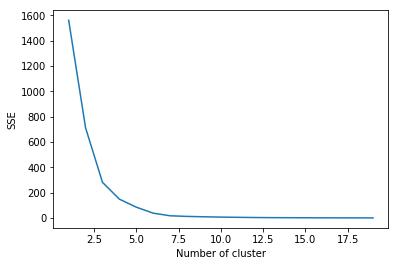

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [64]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

Доля соответствия номера автора номеру кластера

In [65]:
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(aAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(aAuth[Nauth]))
    matches.append(clustMatches)

In [66]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.666667 0.166667 0.571429 0.400000 0.333333 0
0.000000 0.000000 0.000000 0.400000 0.000000 3
0.000000 0.833333 0.142857 0.200000 0.333333 1
0.333333 0.000000 0.000000 0.000000 0.000000 0
0.000000 0.000000 0.285714 0.000000 0.333333 4


In [67]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [68]:
np.set_printoptions(precision=5, suppress=True)

In [69]:
Z = linkage(Xtr, 'ward')

In [70]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(Xtr))
c

0.5956782497014316

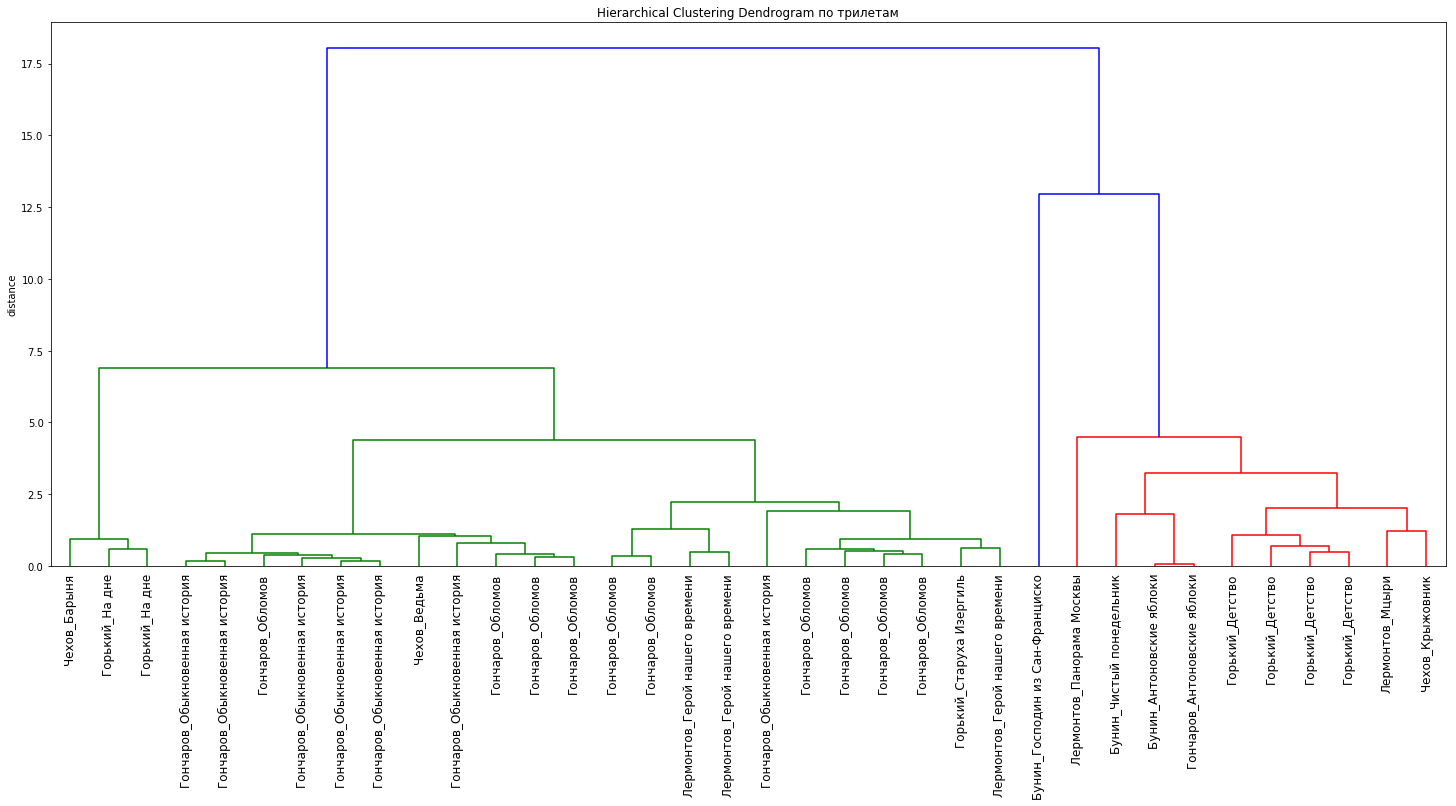

In [71]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram по трилетам')
# plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=label_list,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

In [72]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.5880525460437713

Полная дендрограмма:

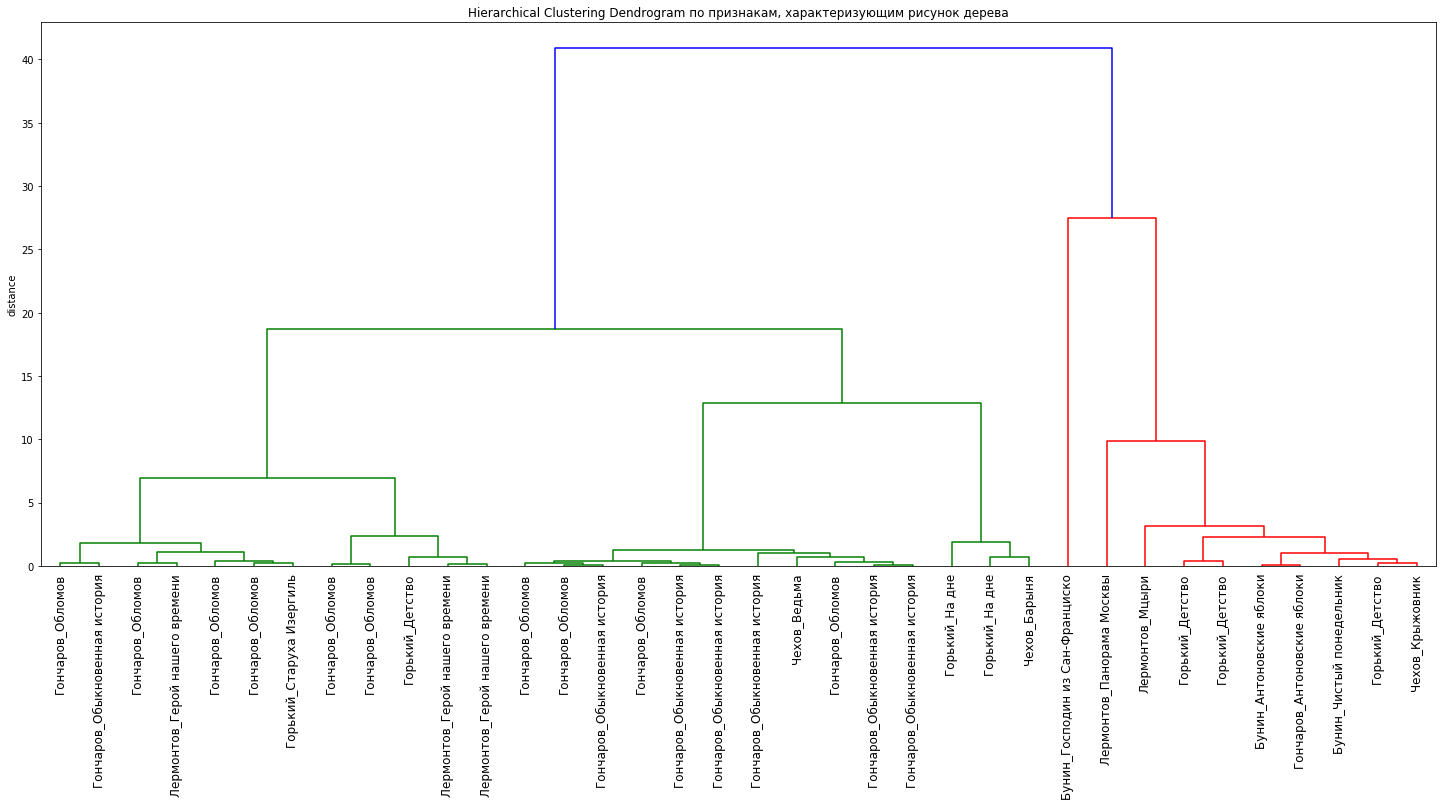

In [73]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram по признакам, характеризующим рисунок дерева')
# plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=label_list,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()